In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.pyplot import figure

In [2]:
dataset=pd.read_csv("./g.csv",index_col="Date",parse_dates=True)

<AxesSubplot:xlabel='Date'>

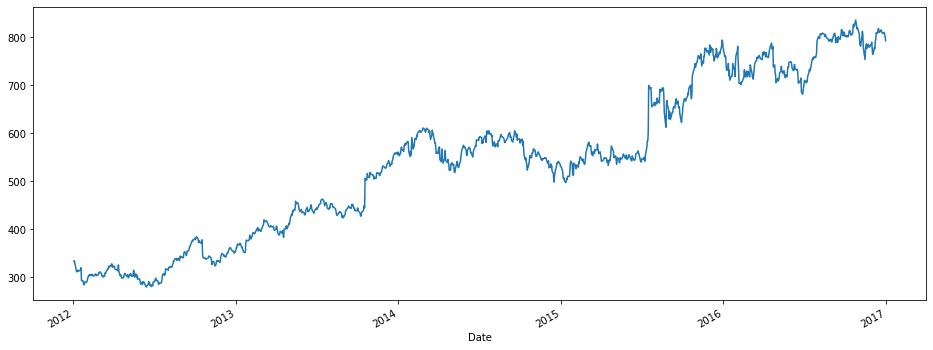

In [3]:
dataset["Close"].plot(figsize=(16,6))

In [4]:
dataset["Volume"]=dataset["Volume"].astype(float)

In [5]:
dataset.rolling(7).mean().head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03         NaN         NaN         NaN         NaN         NaN   
2012-01-04         NaN         NaN         NaN         NaN         NaN   
2012-01-05         NaN         NaN         NaN         NaN         NaN   
2012-01-06         NaN         NaN         NaN         NaN         NaN   
2012-01-09         NaN         NaN         NaN         NaN         NaN   
2012-01-10         NaN         NaN         NaN         NaN         NaN   
2012-01-11  324.538823  326.938368  320.196629  322.771345  322.771345   
2012-01-12  322.985844  324.417271  318.346924  320.213789  320.213789   
2012-01-13  320.213789  321.321320  315.518380  317.118548  317.118548   
2012-01-17  318.058062  319.034031  313.334054  314.942801  314.942801   
2012-01-18  315.732880  317.175031  311.355647  313.719434  313.719434   
2012-01-19  315.338915  316.745318  312.087093  314.942801  314.942801   
2012-01-20  312.534681  313.685115  309.569576  312.286573  312.286573   
2012-01-23  309.853428  310.772919  306.855434  309.395107  309.395107   
2012-01-24  306.643075  307.540401  303.387678  305.912340  305.912340   
2012-01-25  303.157445  304.091239  299.478054  301.944087  301.944087   
2012-01-26  298.867440  299.979985  295.107252  297.619760  297.619760   
2012-01-27  294.874163  296.141859  291.332764  293.835262  293.835262   
2012-01-30  290.373945  291.781067  287.181471  289.410836  289.410836   
2012-01-31  289.835549  291.280566  286.713143  288.990413  288.990413   

                  Volume  
Date                      
2012-01-03           NaN  
2012-01-04           NaN  
2012-01-05           NaN  
2012-01-06           NaN  
2012-01-09           NaN  
2012-01-10           NaN  
2012-01-11  7.174104e+06  
2012-01-12  6.659962e+06  
2012-01-13  6.501064e+06  
2012-01-17  6.108999e+06  
2012-01-18  6.128637e+06  
2012-01-19  6.266413e+06  
2012-01-20  8.030561e+06  
2012-01-23  8.319672e+06  
2012-01-24  8.656649e+06  
2012-01-25  9.421712e+06  
2012-01-26  9.797593e+06  
2012-01-27  1.004186e+07  
2012-01-30  8.907341e+06  
2012-01-31  6.500065e+06

<AxesSubplot:xlabel='Date'>

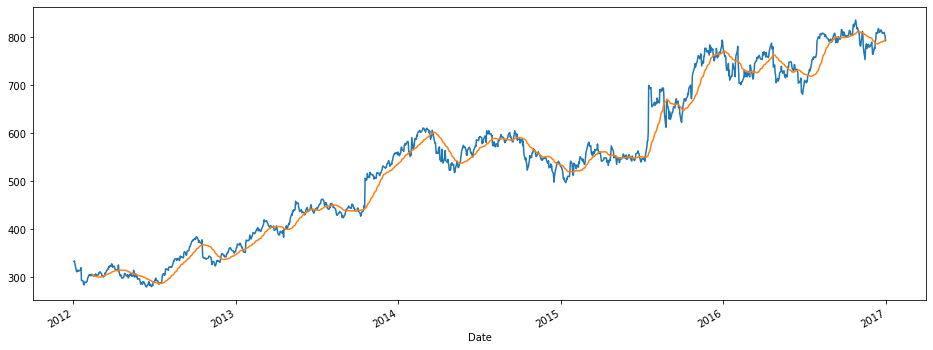

In [6]:
dataset['Close'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

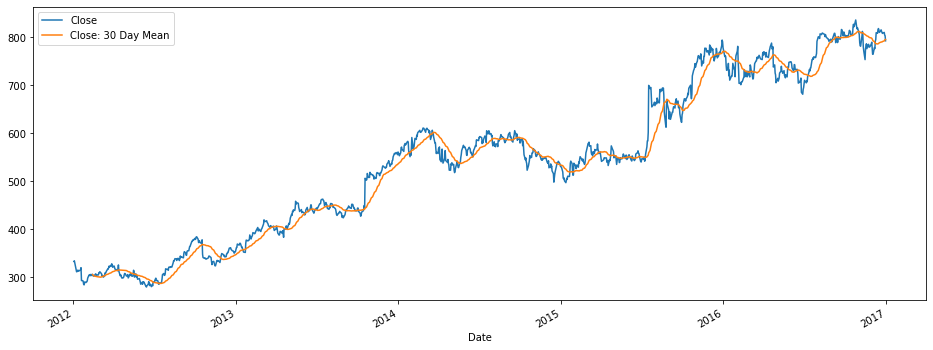

In [7]:
dataset['Close: 30 Day Mean']=dataset["Close"].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [8]:
train=dataset['Close']
train=pd.DataFrame(train)

In [9]:
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train)

In [11]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
#2nd Part
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [84]:
#regressor
r=Sequential()

In [85]:
r.add(LSTM(units=50,return_sequences=True, input_shape = (x_train.shape[1],1)))
r.add(LSTM(units=50))
r.add(Dense(units=1))

In [91]:
r.compile(optimizer='adam', loss= 'mean_squared_error')
#r.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
r.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)

1198/1198 - 23s - loss: 0.0011


In [92]:
test=pd.read_csv('./gogle.csv',index_col="Date",parse_dates=True)

In [93]:
real_stock=test.iloc[:,3].values
print(test.iloc[:,3])

Date
2017-01-03     808.010010
2017-01-04     807.770020
2017-01-05     813.020020
2017-01-06     825.210022
2017-01-09     827.179993
                 ...     
2017-12-22    1068.859985
2017-12-26    1065.849976
2017-12-27    1060.199951
2017-12-28    1055.949951
2017-12-29    1053.400024
Name: Close, Length: 251, dtype: float64


In [94]:
test.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  800.619995  811.440002  796.890015  808.010010  808.010010   
2017-01-04  809.890015  813.429993  804.109985  807.770020  807.770020   
2017-01-05  807.500000  813.739990  805.919983  813.020020  813.020020   
2017-01-06  814.989990  828.960022  811.500000  825.210022  825.210022   
2017-01-09  826.369995  830.429993  821.619995  827.179993  827.179993   

             Volume  
Date                 
2017-01-03  1959000  
2017-01-04  1515300  
2017-01-05  1340500  
2017-01-06  2017100  
2017-01-09  1408900

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [96]:
test_set=test['Close']
test_set=pd.DataFrame(test_set)

In [97]:
dataset_total=pd.concat((dataset['Close'],test['Close']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=r.predict(x_test)
predicted_stock=sc.inverse_transform(predicted_stock)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


<AxesSubplot:>

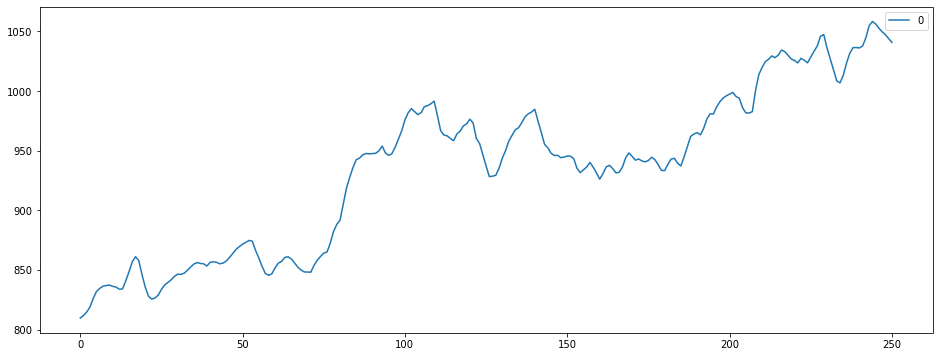

In [98]:
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.info()
predicted_stock.plot(figsize=(16,6))

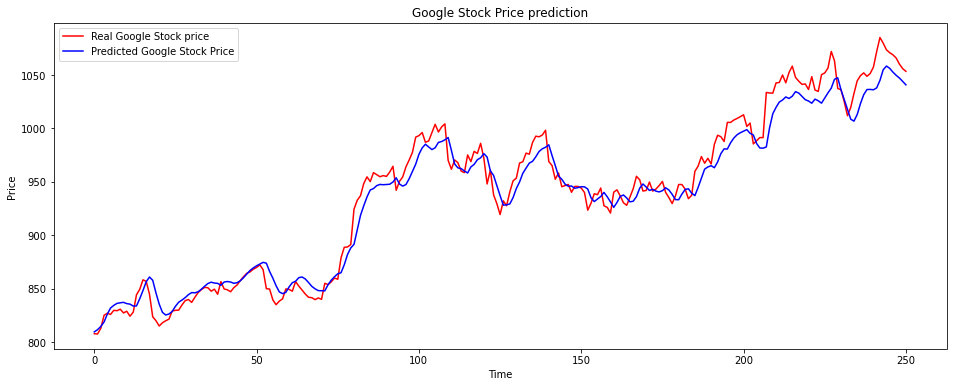

In [99]:
plt.figure(figsize=(16,6))
plt.plot(real_stock,color='red', label='Real Google Stock price')
plt.plot(predicted_stock,color='blue', label="Predicted Google Stock Price")
plt.title("Google Stock Price prediction")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [100]:
test.reset_index(drop=True, inplace=True)
test["Pred"]=predicted_stock
test[["Close","Pred"]].head(50)
l=[]

for i in range(0,len(test)):
    l.append((min(test["Pred"][i],test["Close"][i])/max(test["Pred"][i],test["Close"][i]))*100)
test["Accuracy"]=l
print((sum(l)/(100*len(test)))*100)

98.8381563615598


In [101]:
test[["Close","Pred","Accuracy"]].head(50)

Close        Pred   Accuracy
0   808.010010  809.707092  99.790408
1   807.770020  811.795959  99.504070
2   813.020020  814.775757  99.784513
3   825.210022  818.911255  99.236707
4   827.179993  826.199829  99.881505
5   826.010010  832.005066  99.279445
6   829.859985  834.517456  99.441897
7   829.530029  836.371094  99.182054
8   830.940002  836.936707  99.283494
9   827.460022  837.341614  98.819885
10  829.020020  836.173340  99.144517
11  824.369995  835.683044  98.646251
12  828.169983  833.872437  99.316148
13  844.429993  834.000793  98.764942
14  849.530029  840.729492  98.964070
15  858.450012  848.422302  98.831882
16  856.979980  856.689331  99.966084
17  845.030029  861.050537  98.139423
18  823.830017  857.970764  96.020756
19  820.190002  846.201477  96.926090
20  815.239990  835.690247  97.552890
21  818.260010  827.963013  98.828087
22  820.130005  825.503662  99.349045
23  821.619995  826.455078  99.414961
24  829.229980  828.831238  99.951914
25  829.880005  833.672607  99.545073
26  830.059998  837.468811  99.115333
27  834.849976  839.465454  99.450188
28  838.960022  841.784302  99.664489
29  840.030029  844.536682  99.466376
30  837.320007  846.483093  98.917511
31  842.169983  846.253845  99.517419
32  846.549988  847.250610  99.917306
33  849.270020  849.667297  99.953243
34  851.359985  852.445923  99.872609
35  851.000000  854.955872  99.537301
36  847.809998  856.208374  99.019120
37  849.669983  855.407166  99.329304
38  844.929993  855.111389  98.809349
39  856.750000  853.283264  99.595362
40  849.849976  856.356934  99.240158
41  849.080017  856.831726  99.095306
42  847.270020  856.337646  98.941115
43  851.150024  855.138428  99.533596
44  853.640015  855.751160  99.753299
45  857.840027  857.535278  99.964475
46  861.409973  860.526917  99.897487
47  864.580017  863.954590  99.927661
48  865.909973  867.250549  99.845422
49  868.390015  869.581116  99.863026

942.7783559127143
